In [1]:
!conda activate wheat

In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
# make dir for results
RESULTS_DIR = '../eda/pics'
os.makedirs(RESULTS_DIR, exist_ok=True)

In [59]:
# get meta
META_FILE = '../../data/database/database/ann_db.csv'
df = pd.read_csv(META_FILE).set_index('Unnamed: 0')
df.index.name = 'patient'
df.head()

,1220,1234,1208,1038,1004,1010,1022,1036,2041,1206,...,1079,1290,1284,1077,1063,1088,1253,1247,2028,2014
patient,,,,,,,,,,,,,,,,,,,,,
pH,7.30,7.29,7.23,7.33,7.30,7.35,7.28,7.08,7.37,7.24,...,7.17,7.36,7.16,7.22,7.16,7.25,7.32,7.32,7.18,7.32
BDecf,3.52,2.50,5.84,2.72,5.19,5.20,1.53,8.11,3.69,2.06,...,7.91,3.88,5.07,6.69,5.56,2.58,0.89,-0.86,4.82,2.28
pCO2,6.00,6.50,6.60,5.70,5.50,4.70,7.00,9.30,4.80,7.70,...,7.10,4.90,8.50,6.50,8.30,7.30,6.40,6.90,8.10,6.00
BE,-4.70,-4.20,-7.40,-4.00,-6.40,-5.90,-3.00,-11.20,-3.10,-4.00,...,-9.90,-4.10,-7.30,-8.00,-7.90,-4.50,-1.70,-1.00,-7.20,-3.20
Apgar1,9.00,8.00,9.00,10.00,8.00,8.00,10.00,8.00,9.00,9.00,...,8.00,9.00,10.00,6.00,9.00,8.00,8.00,9.00,8.00,10.00


In [60]:
df_train = df.transpose()
df_train.head()

patient,pH,BDecf,pCO2,BE,Apgar1,Apgar5,NICU days,Seizures,HIE,Intubation,...,Induced,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type,Pos. II.st.,Sig2Birth
1220,7.30,3.52,6.0,-4.7,9.0,10.0,0.0,0.0,0.0,0.0,...,1.0,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0,14400.0,0.0
1234,7.29,2.50,6.5,-4.2,8.0,9.0,0.0,0.0,0.0,0.0,...,0.0,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0,14400.0,0.0
1208,7.23,5.84,6.6,-7.4,9.0,9.0,0.0,0.0,0.0,0.0,...,0.0,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0,14400.0,0.0
1038,7.33,2.72,5.7,-4.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0,14400.0,0.0
1004,7.30,5.19,5.5,-6.4,8.0,9.0,0.0,0.0,0.0,0.0,...,1.0,55.0,0.0,0.0,10.0,1.0,983277.0,12.0,14400.0,0.0


In [61]:
#df_train.to_csv('meta_ctg.csv')

In [62]:
META_FILE = '../meta.csv'
df_train = pd.read_csv(META_FILE).set_index('Unnamed: 0')
df_train.index.name = 'patient'
df_train.head()

,patient,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),Sex,...,Induced,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type,Pos. II.st.,target
patient,,,,,,,,,,,,,,,,,,,,,
0,1220,7.30,3.52,6.0,-4.7,9.0,10.0,42.0,3100.0,2.0,...,1.0,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0,14400.0,0
1,1234,7.29,2.50,6.5,-4.2,8.0,9.0,41.0,3200.0,1.0,...,0.0,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0,14400.0,0
2,1208,7.23,5.84,6.6,-7.4,9.0,9.0,40.0,3900.0,2.0,...,0.0,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0,14400.0,0
3,1038,7.33,2.72,5.7,-4.0,10.0,10.0,39.0,2740.0,1.0,...,0.0,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0,14400.0,0
4,1004,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,1.0,...,1.0,55.0,0.0,0.0,10.0,1.0,983277.0,12.0,14400.0,0


In [63]:
#check the colunms
df_train.columns

Index(['patient', 'pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5',
       'Gest. weeks', 'Weight(g)', 'Sex', 'Age', 'Gravidity', 'Parity',
       'Diabetes', 'Hypertension', 'Preeclampsia', 'Liq.', 'Pyrexia',
       'Meconium', 'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP',
       'II.stage', 'Deliv. type', 'dbID', 'Rec. type', 'Pos. II.st.',
       'target'],
      dtype='object')

In [64]:
# target describe
print(df_train['pH'].describe())

count    552.000000
mean       7.230054
std        0.105039
min        6.850000
25%        7.170000
50%        7.250000
75%        7.300000
max        7.470000
Name: pH, dtype: float64


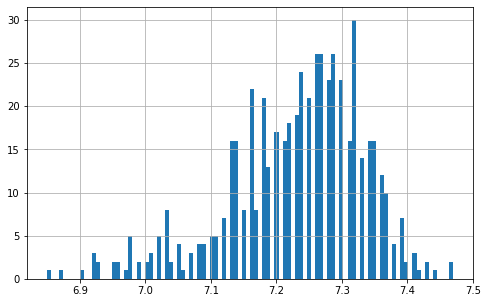

In [65]:
#histogram
plt.figure(figsize=(8,5))
df_train['pH'].hist(bins=100)

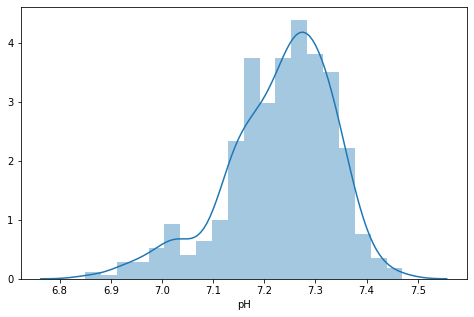

In [66]:
#histogram
plt.figure(figsize=(8,5))
sns.distplot(df_train['pH'])

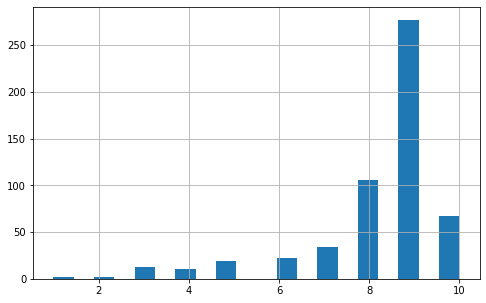

In [67]:
#histogram
plt.figure(figsize=(8,5))
df_train['Apgar1'].hist(bins=20)

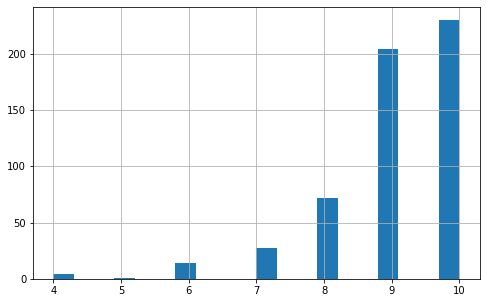

In [68]:
#histogram
plt.figure(figsize=(8,5))
df_train['Apgar5'].hist(bins=20)

**What is the criteria?** 

Czabanski et al. 2013 [46] Normal; abnormal Apgar 10 min. < 5

Nielsen et al. 1988 [28] Normal; pathological Apgar 1 min. < 7 or pH < 7.15 or BE < -10

Georgieva et al. 2013 [45] Normal; adverse pH < 7.1 & neonatology

Spilka et al. 2012 [23] Normal; pathological pH < 7.15

Warrick et al. 2010 [43] Normal; pathological BDecf < 8; BDecf ≥ 12


*From: Chudáˇcek et al. BMC Pregnancy and Childbirth 2014, 14:16
http://www.biomedcentral.com/1471-2393/14/16 

In [69]:
df_train['Apgar1'][df_train['Apgar1'] > 7].count()

450

In [70]:
df_train['Apgar1'][df_train['Apgar1'] == 7].count()

34

In [71]:
df_train['Apgar1'][df_train['Apgar1'] < 7].count()

68

In [72]:
df_train['Apgar1'][(df_train['Apgar1'] < 7)&(df_train['pH'] < 7.05)].count()

21

In [73]:
df_train['Apgar1'][(df_train['Apgar1'] > 7)&(df_train['pH'] < 7.05)].count()

17

Classes distribution

In [74]:
df_train['pH'][df_train['pH'] >= 7.15].count()

447

In [75]:
df_train['pH'][(df_train['pH'] < 7.15)&(df_train['pH'] >= 7.05)].count()

65

In [76]:
df_train['pH'][df_train['pH'] < 7.05].count()

40

In [77]:
df_train = df_train.fillna(0)

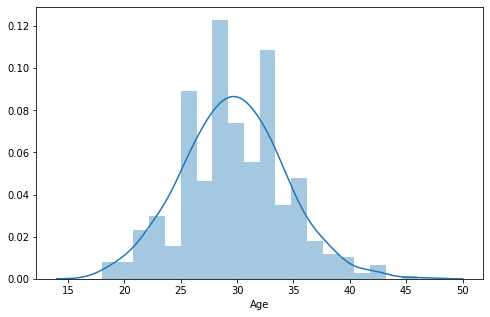

In [78]:
#histogram
plt.figure(figsize=(8,5))
sns.distplot(df_train['Age'])

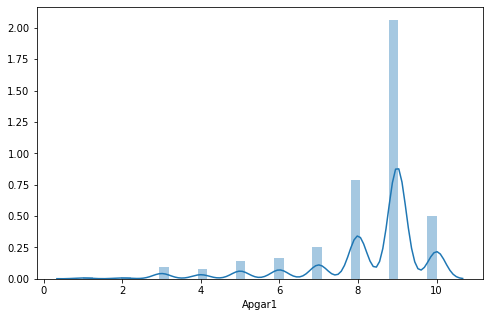

In [79]:
#histogram
plt.figure(figsize=(8,5))
sns.distplot(df_train['Apgar1'])

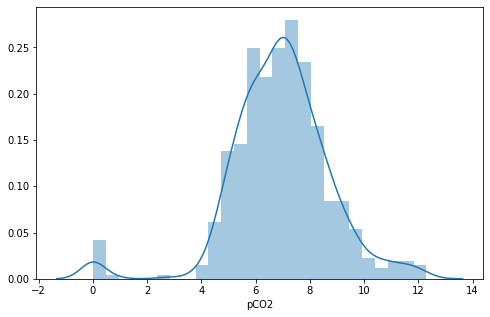

In [80]:
#histogram
plt.figure(figsize=(8,5))
sns.distplot(df_train['pCO2'])

In [81]:
df_train['pH'][df_train['Deliv. type'] == 2].count()


46

In [82]:
df_train['pH'][df_train['Deliv. type'] == 2].describe()

count    46.000000
mean      7.186957
std       0.149724
min       6.850000
25%       7.030000
50%       7.260000
75%       7.300000
max       7.390000
Name: pH, dtype: float64

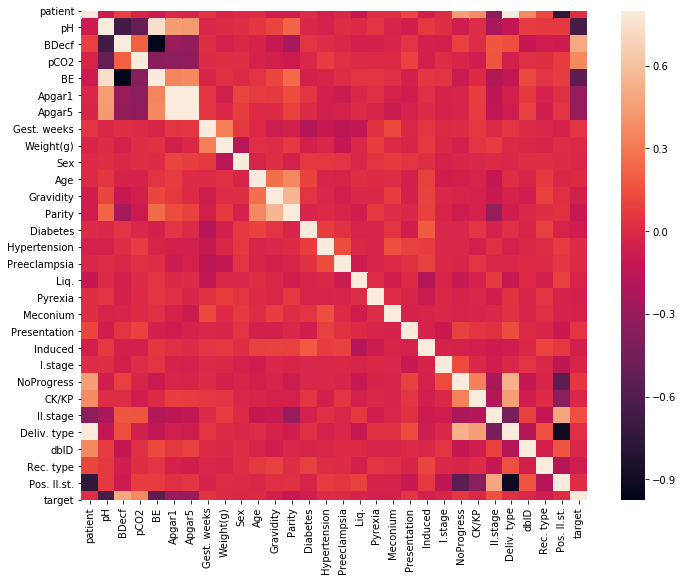

In [83]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [53]:
exclude = ['NICU days', 'Seizures', 'HIE', 'Intubation', 'Main diag.', 'Other diag.', 'Sig2Birth']

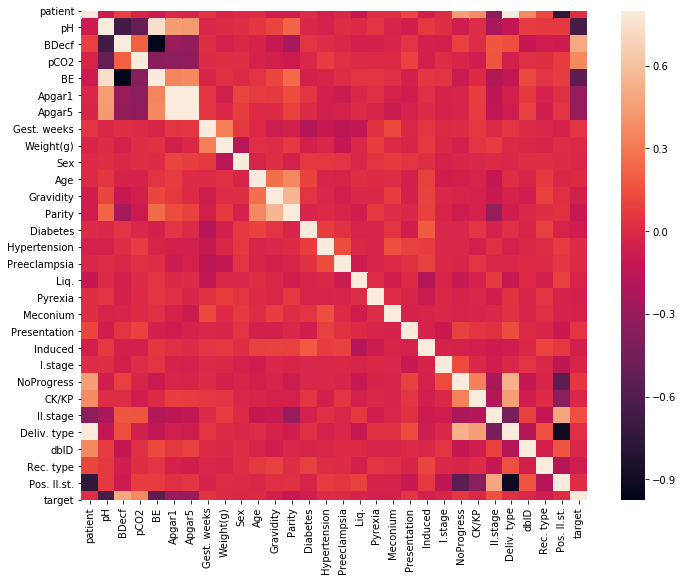

In [86]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [59]:
df_train.to_csv('meta.csv')

In [88]:
META_FILE = '../meta.csv'
df_train = pd.read_csv(META_FILE)
#df_train.index.name = 'patient'
df_train.head()

,Unnamed: 0,patient,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),...,Induced,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type,Pos. II.st.,target
0,0,1220,7.30,3.52,6.0,-4.7,9.0,10.0,42.0,3100.0,...,1.0,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0,14400.0,0
1,1,1234,7.29,2.50,6.5,-4.2,8.0,9.0,41.0,3200.0,...,0.0,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0,14400.0,0
2,2,1208,7.23,5.84,6.6,-7.4,9.0,9.0,40.0,3900.0,...,0.0,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0,14400.0,0
3,3,1038,7.33,2.72,5.7,-4.0,10.0,10.0,39.0,2740.0,...,0.0,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0,14400.0,0
4,4,1004,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,...,1.0,55.0,0.0,0.0,10.0,1.0,983277.0,12.0,14400.0,0


In [38]:
# create target column
df_train['target'] = 0
df_train['target'][df_train['pH'] >= 7.15] = 0

In [39]:
df_train['target'][(df_train['pH'] < 7.15)&(df_train['pH'] >= 7.05)] = 2
df_train['target'][df_train['pH'] < 7.05] = 1
df_train['target'].unique()

array([0, 2, 1], dtype=int64)

In [40]:
# check
df_train['target'].value_counts()

0    447
2     65
1     40
Name: target, dtype: int64

In [41]:
df_train.to_csv('meta.csv')

In [89]:
select = ['pH', 'pCO2', 'BE', 'Apgar1', 'Gest. weeks', 'Weight(g)', 'Age', 'Gravidity', 'Parity',
       'Diabetes', 'Hypertension', 'Preeclampsia',  'Liq.',
       'Meconium', 'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP',
       'II.stage', 'Deliv. type', 'Rec. type', 'Pos. II.st.', 'target']

In [90]:
# filter C-section
df = df_train[df_train['Deliv. type'] == 1]
df['pH'].describe()

count    506.000000
mean       7.233972
std        0.099278
min        6.870000
25%        7.180000
50%        7.250000
75%        7.300000
max        7.470000
Name: pH, dtype: float64

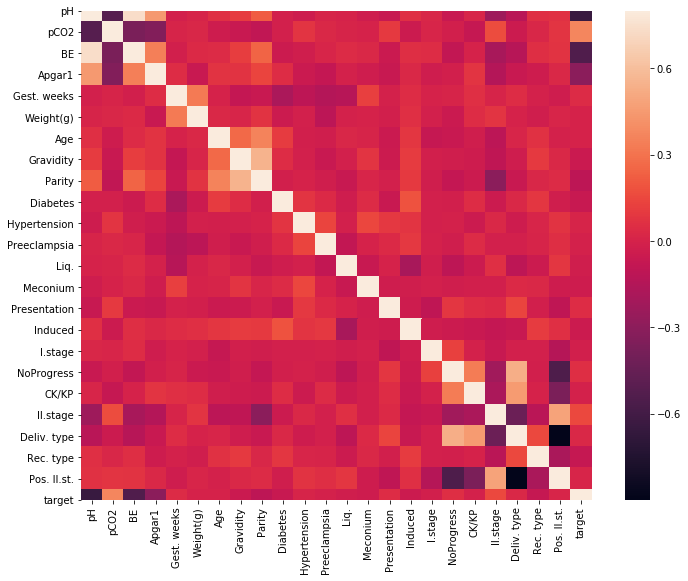

In [91]:
#correlation matrix
corrmat = df_train[select].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

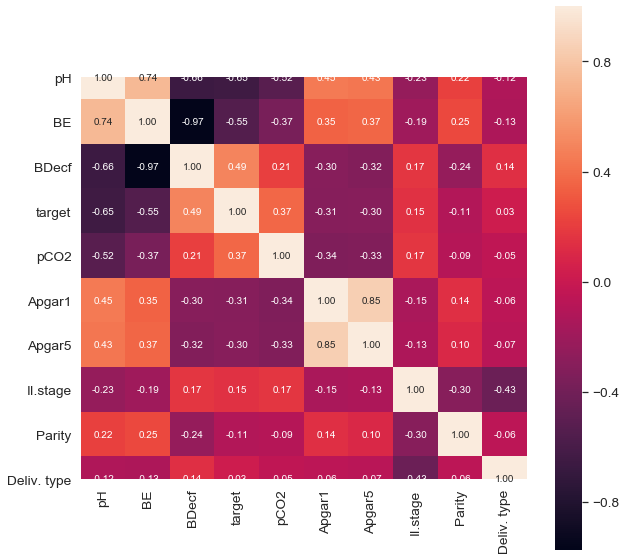

In [92]:
# most correlated factors, correlation matrix
df_train = df_train.drop('patient', axis=1)
plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = abs(corrmat).nlargest(k, 'pH')['pH'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

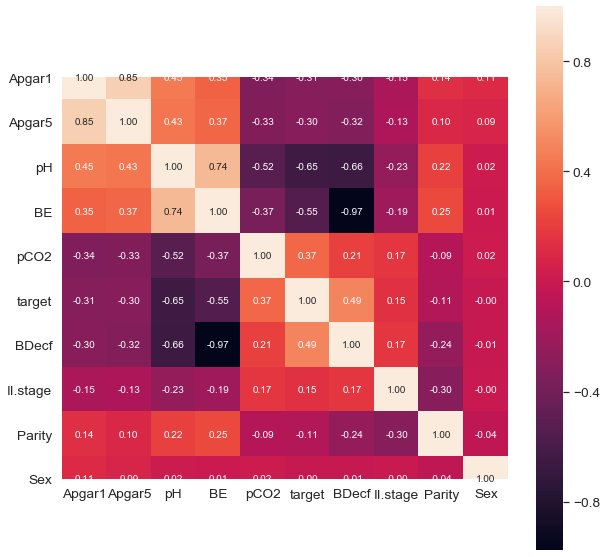

In [93]:
plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = abs(corrmat).nlargest(k, 'Apgar1')['Apgar1'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [98]:
# generate random var
random =np.random.rand(552)
df = df_train.copy()
df['random'] = random
df.head()

,Unnamed: 0,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),Sex,...,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type,Pos. II.st.,target,random
0,0,7.30,3.52,6.0,-4.7,9.0,10.0,42.0,3100.0,2.0,...,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0,14400.0,0,0.952863
1,1,7.29,2.50,6.5,-4.2,8.0,9.0,41.0,3200.0,1.0,...,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0,14400.0,0,0.176096
2,2,7.23,5.84,6.6,-7.4,9.0,9.0,40.0,3900.0,2.0,...,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0,14400.0,0,0.104844
3,3,7.33,2.72,5.7,-4.0,10.0,10.0,39.0,2740.0,1.0,...,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0,14400.0,0,0.706089
4,4,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,1.0,...,55.0,0.0,0.0,10.0,1.0,983277.0,12.0,14400.0,0,0.170938


In [99]:
exclude = ['BE', 'BDecf', 'pCO2', 'Apgar1', 'Apgar5', 'dbID', 'Rec. type', 'Sex', 'Unnamed: 0']
df2 = df.drop(exclude, axis=1)

In [102]:
exclude = ['BE', 'BDecf', 'pCO2', 'Apgar5', 'dbID', 'pH', 'target','Unnamed: 0']
df3 = df.drop(exclude, axis=1)

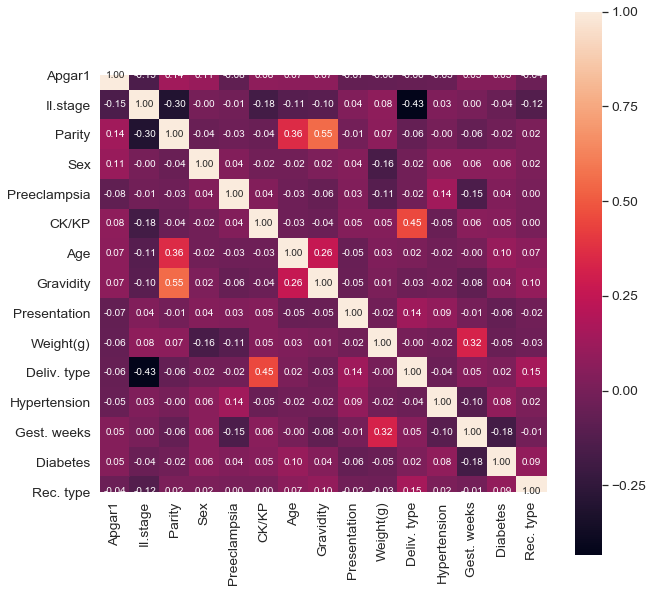

In [103]:
plt.figure(figsize=(10,10))
k = 15 #number of variables for heatmap
corrmat = df3.corr()
cols = abs(corrmat).nlargest(k, 'Apgar1')['Apgar1'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

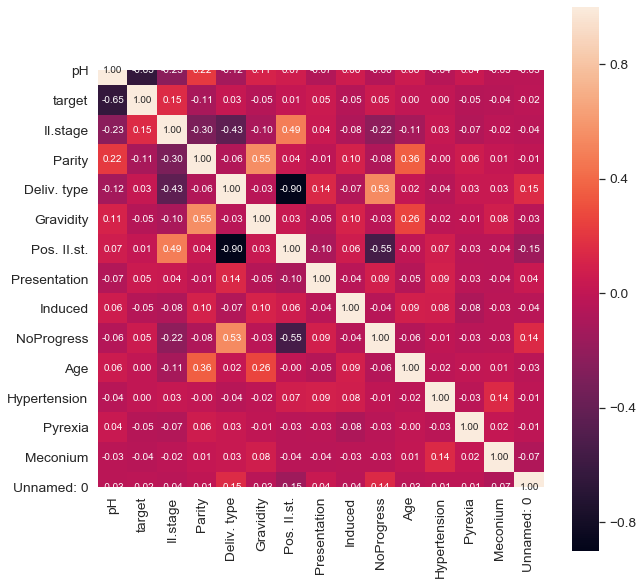

In [104]:
plt.figure(figsize=(10,10))
k = 15 #number of variables for heatmap
corrmat = df2.corr()
cols = abs(corrmat).nlargest(k, 'pH')['pH'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

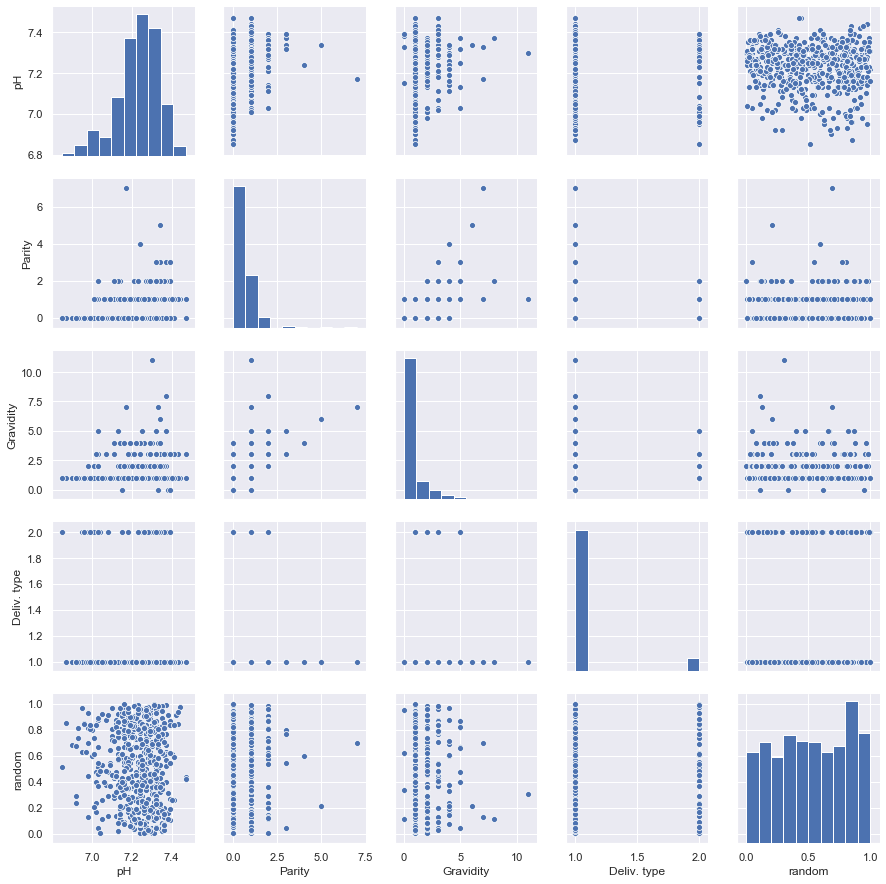

In [29]:
# scatter plot
sns.set()
cols = ['pH', 'Parity', 'Gravidity', 'Deliv. type', 'random']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

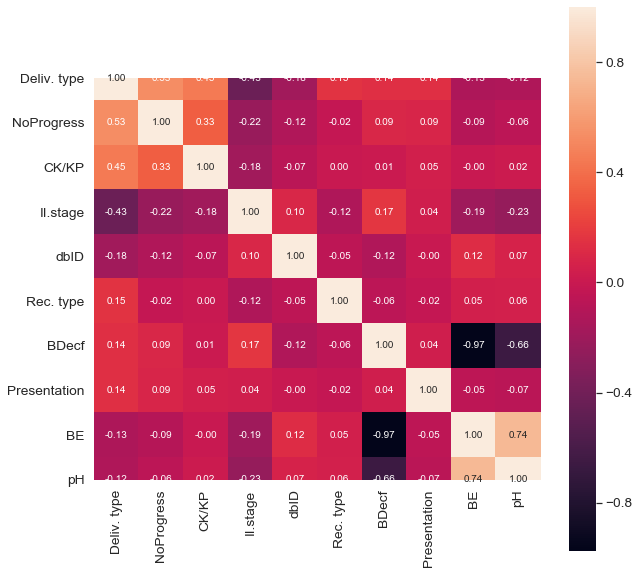

In [114]:
# most correlated factors, correlation matrix
#df_train = df_train.drop('Pos. II.st.', axis=1)
plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = abs(corrmat).nlargest(k, 'Deliv. type')['Deliv. type'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

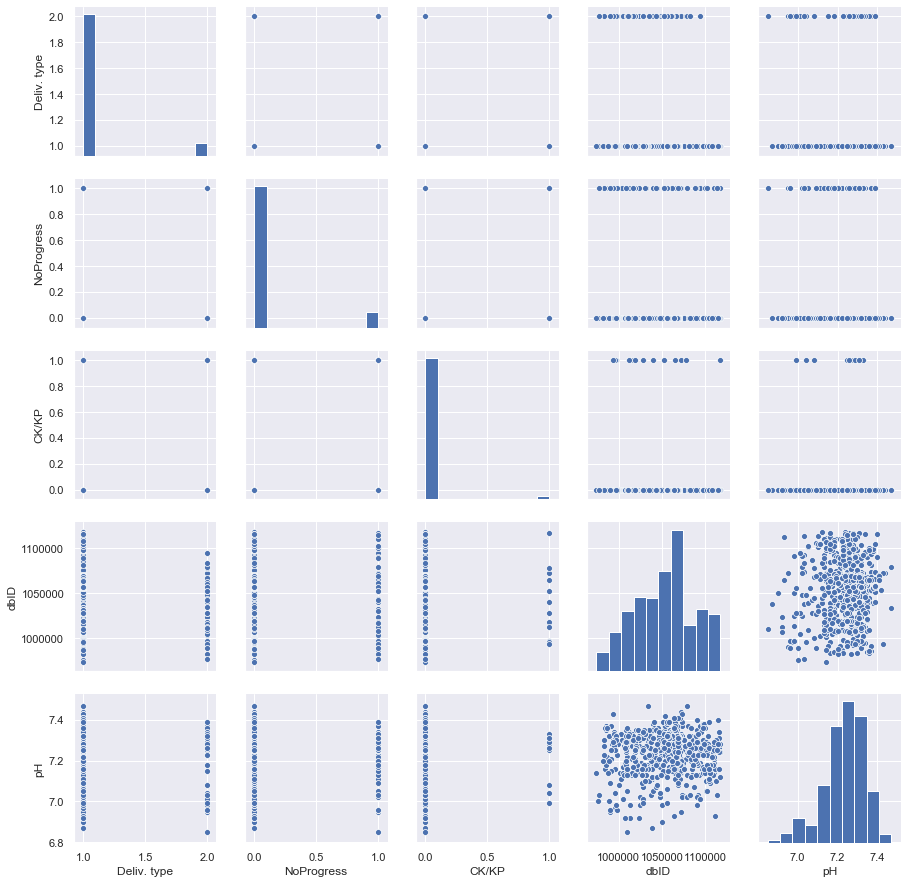

In [116]:
# scatter plot
sns.set()
cols = ['Deliv. type', 'NoProgress', 'CK/KP', 'dbID', 'pH']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [85]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Pos. II.st.,0,0.0
Diabetes,0,0.0
pH,0,0.0
BDecf,0,0.0
pCO2,0,0.0


In [117]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head()

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. weeks,Weight(g),Sex,Age,...,Meconium,Presentation,Induced,I.stage,NoProgress,CK/KP,II.stage,Deliv. type,dbID,Rec. type
0,7.30,3.52,6.0,-4.7,9.0,10.0,42.0,3100.0,2.0,34.0,...,1.0,1.0,1.0,165.0,0.0,0.0,15.0,1.0,1051632.0,2.0
1,7.29,2.50,6.5,-4.2,8.0,9.0,41.0,3200.0,1.0,29.0,...,1.0,1.0,0.0,135.0,0.0,0.0,10.0,1.0,1054195.0,1.0
2,7.23,5.84,6.6,-7.4,9.0,9.0,40.0,3900.0,2.0,26.0,...,1.0,1.0,0.0,260.0,0.0,0.0,30.0,1.0,1049536.0,12.0
3,7.33,2.72,5.7,-4.0,10.0,10.0,39.0,2740.0,1.0,24.0,...,0.0,2.0,0.0,15.0,0.0,0.0,10.0,1.0,1002508.0,1.0
4,7.30,5.19,5.5,-6.4,8.0,9.0,41.0,3370.0,1.0,36.0,...,1.0,1.0,1.0,55.0,0.0,0.0,10.0,1.0,983277.0,12.0
